In [1]:
'''
install the library to download and extract images from MNIST dataset
'''
import tensorflow as tf
import numpy as np
import graphviz
import time
import os
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
! pip install get-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
'''
load the dataset
x, y: images and labels for training phase
x_test, y_test: images and label for test phase
'''

from mnist import fashion_mnist
x, y, x_test, y_test = fashion_mnist('FASHION_MNIST')
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)
print('labels:', label_names)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)
labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
print(x[0])
print(y[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

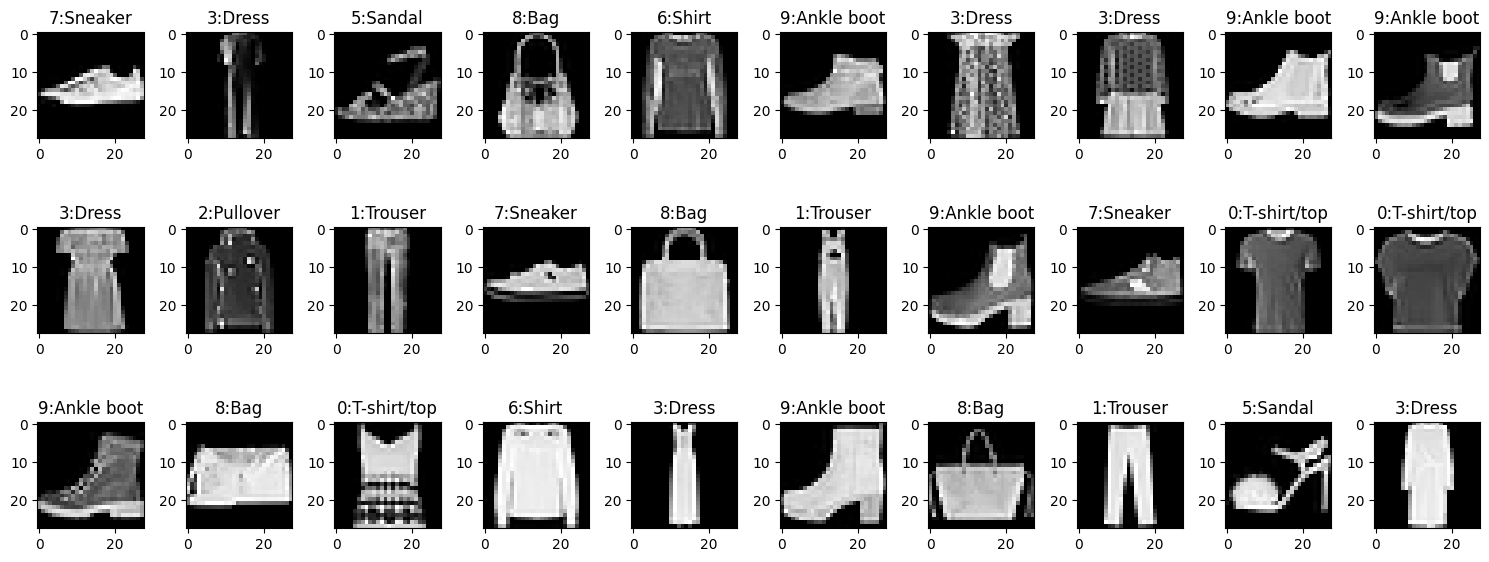

In [4]:
'''
illustrate several images and corresponding labels in the training set
'''

import matplotlib.pyplot as plt

num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x[i], cmap='gray')
    ax.set_title('%d:%s'%(y[i], label_names[y[i]]))
plt.tight_layout()
plt.show()

In [5]:
'''
TODO 01: data preprocessing.
Currently, the input x is a matrix with shape (60000, 28, 28) --> a list with 60000 elements which are 28x28 image/matrices
You can utilize the original shape of each image (28x28) or transform them into vectors (784) based on your approaches.
Each pixel in an image is in a 0-255 range.
You can utilize the original pixel range or scale image pixels into the 0.0-1.0 range base on your approaches.
Other methods for data preprocessing are highly encouraged.
'''
x = np.reshape(x, (x.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))


In [6]:
'''
TODO 02: create a classification model
hint: Decission Tree, Random Forest, KNN, SVM, Neural Networks, etc.
      Library: scikit-learn, tensorflow/pytorch (they are complicated, consider carefully in advance)
      FYI: https://scikit-learn.org/stable/getting_started.html
'''

clc = RandomForestClassifier(n_estimators=64, n_jobs=-1, random_state=0)

clf = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))])

# Use cross-validation to evaluate performance
print('Cross-validation scores:')
# for name, model in [('Random Forest', clc), ('SVM', clf)]:
#     scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
#     print(f'{name}: {np.mean(scores):.4f} (std={np.std(scores):.4f})')

Cross-validation scores:


In [7]:
'''
TODO 03: train the model using the training set (x, y)
and compute the accuracy using the test set (x_test, y_test)

'''

# Use the for loop to calculate the avg accuracy score of the training set and test set, and the running time for both of them. Because the accuracy score may be different after each train and test
num_iterations = 3
rf_train_times = []
svm_train_times = []
rf_test_times = []
svm_test_times = []

for i in range(num_iterations):
    start_time = time.time()
    clc.fit(x, y)
    train_accuracy_clc = clc.score(x, y)
    rf_train_times.append(time.time() - start_time)

    start_time = time.time()
    clf.fit(x, y)
    train_accuracy_clf = clf.score(x, y)
    svm_train_times.append(time.time() - start_time)

    start_time = time.time()
    y_predicted = clc.predict(x_test)
    rf_test_times.append(time.time() - start_time)

    start_time = time.time()
    y_pred = clf.predict(x_test)
    svm_test_times.append(time.time() - start_time)


In [8]:
'''
TODO 04: Display the accuracy in the training set and the test set after this phase
# '''


print('-------------------------------------------------------------')
print('Random forest')
print(classification_report(y_test, y_predicted, target_names=label_names))
print("Avg Training set accuracy: ", train_accuracy_clc )
print("Avg Time taken to complete train(seconds) : ", sum(rf_train_times) / num_iterations)
print("Avg Time taken to complete set(seconds) : ", sum(rf_test_times) / num_iterations)


print('\n')
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y_test, y_pred, target_names=label_names))
print("Avg Training set accuracy: ", train_accuracy_clf)
print("Avg Time taken to complete train (seconds): ", sum(svm_train_times) / num_iterations)
print("Avg Time taken to complete set (seconds): ", sum(svm_test_times) / num_iterations)



-------------------------------------------------------------
Random forest
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1202
     Trouser       1.00      0.96      0.98      1219
    Pullover       0.79      0.82      0.80      1205
       Dress       0.86      0.92      0.89      1184
        Coat       0.77      0.83      0.80      1202
      Sandal       0.97      0.96      0.97      1211
       Shirt       0.75      0.58      0.65      1218
     Sneaker       0.94      0.94      0.94      1159
         Bag       0.96      0.97      0.97      1197
  Ankle boot       0.95      0.96      0.95      1203

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Avg Training set accuracy:  0.9999375
Avg Time taken to complete train(seconds) :  52.74794888496399
Avg Time taken to complete set(seconds) :  0.3022158145904541




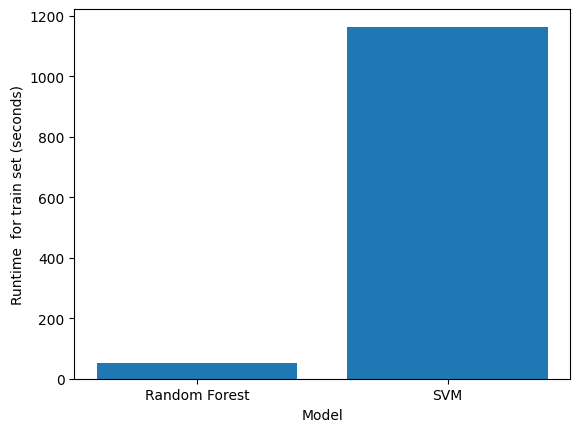

In [9]:
import matplotlib.pyplot as plt

'''
create a bar chart to compare the run time of two training models 
'''

# define the runtime of two models in seconds
model1_runtime = sum(rf_train_times) / num_iterations
model2_runtime = sum(svm_train_times) / num_iterations

# plot the runtime comparison using a bar chart
fig, ax = plt.subplots()
ax.bar(['Random Forest', 'SVM'], [model1_runtime, model2_runtime])
ax.set_xlabel('Model')
ax.set_ylabel('Runtime  for train set (seconds)')
plt.show()


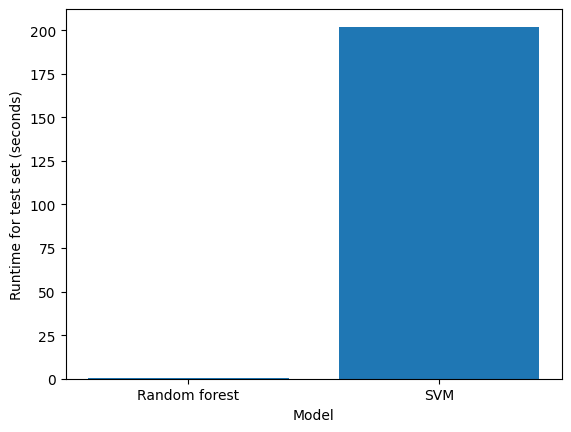

In [10]:
'''
 Create a bar chart to compare the run time of two test models 
'''
# define the runtime of two models in seconds
model1_runtime = sum(rf_test_times) / num_iterations
model2_runtime = sum(svm_test_times) / num_iterations

# plot the runtime comparison using a bar chart
fig, ax = plt.subplots()
ax.bar(['Random forest', 'SVM'], [model1_runtime, model2_runtime])
ax.set_xlabel('Model')
ax.set_ylabel('Runtime for test set (seconds)')
plt.show()


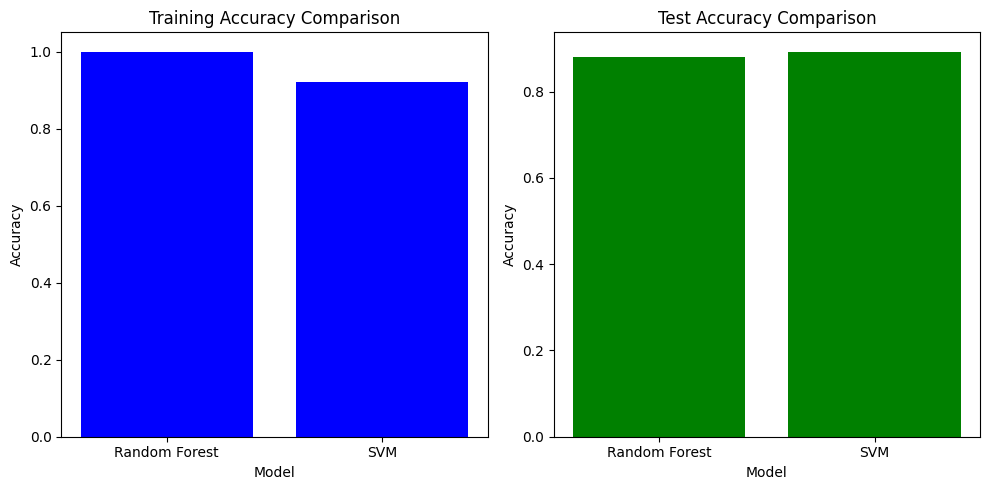

In [11]:
'''
Create a bar chart to compare the accuracy score of two test models (trainning set and test set) 
'''

# define the labels for the plot
labels = ['Random Forest', 'SVM']

# define the accuracy scores for each model
accuracy_train_scores = [train_accuracy_clc, train_accuracy_clf]

accuracy_test_scores = [clc.score(x_test, y_test), clf.score(x_test, y_test)]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot the training accuracy scores
ax1.bar(labels, accuracy_train_scores, color ='b')
ax1.set_title('Training Accuracy Comparison')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')

# plot the test accuracy scores
ax2.bar(labels, accuracy_test_scores, color ='g')
ax2.set_title('Test Accuracy Comparison')
ax2.set_xlabel('Model')
ax2.set_ylabel('Accuracy')

# adjust the layout and spacing between subplots
fig.tight_layout()

# display the plots
plt.show()